In [34]:
%pylab inline
mask_dir  = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ipynb_data/'
ipynb_data_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import subprocess
import numpy as np
#output from anand's ccd list
anand_obiwan_dat = fits.open(ipynb_data_dir+'random_subset.fits')[1].data
#output from kaylan's ccd list
kaylan_obiwan_dat = fits.open(ipynb_data_dir+'random_subset_old.fits')[1].data
#brick info
brick_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/legacysurveydir_dr3/'
brick_info = fits.open(brick_dir+'survey-ccds-ebossDR3.fits.gz')

Populating the interactive namespace from numpy and matplotlib


In [35]:
brickstat_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/obiwan_run/brickstat/'
#finished bricks from kaylan's ccd list
kaylan_bricks = np.loadtxt(brickstat_dir+'ProcessedBricks.txt',dtype = np.str)
#finished bricks from anand's ccd list
anand_bricks = np.loadtxt(brickstat_dir+'elg_new_ccd_list/FinishedBricks.txt',dtype=np.str)

In [36]:
overlap_bricks = set.intersection(set(kaylan_bricks), set(anand_bricks))

In [37]:
overlap_bricks = list(overlap_bricks)

In [38]:
overlap_bricks[0]

'0168m027'

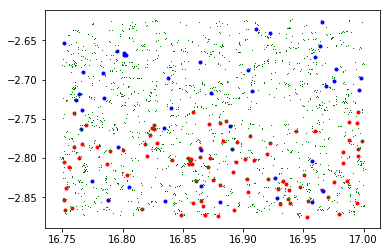

In [45]:
brickname = '0168m027'
sel1 = anand_obiwan_dat['brickname']
sel2 = kaylan_obiwan_dat['brickname']
SEL1 = (sel1==brickname)
SEL2 = (sel2==brickname)
dat_anand = anand_obiwan_dat[SEL1]
dat_kaylan = kaylan_obiwan_dat[SEL2]
plt.plot(dat_anand['ra'],dat_anand['dec'],'r.')
plt.plot(dat_kaylan['ra'],dat_kaylan['dec'],'b.')

log_dir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_new_ccd_list/logs/'+str(brickname[:3])+'/rs0/log.'+str(brickname)
tractor_fn = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/elg_new_ccd_list/tractor/'+str(brickname[:3])+'/'+str(brickname)+'/more_rs0/'+'tractor-'+str(brickname)+'.fits'    
dat_raw_anand = fits.open(tractor_fn)[1].data
plt.plot(dat_raw_anand['ra'],dat_raw_anand['dec'],'g,')

In [48]:
import numpy as n
def select_ELG( path_2_tractor_file , startid = None, nobj = None):
    """
    Given the path to a tractor catalog, it returns two sub catalogs with the eBOSS ELG selections applied (NGC and SGC).
    """
    # opens the tractor file
    if startid is not None:
        assert(nobj is not None)
        hdu=fits.open(path_2_tractor_file)
        dat=hdu[1].data[startid:startid+nobj]
        hdu.close()
    else:
            hdu=fits.open(path_2_tractor_file)
            dat=hdu[1].data
            hdu.close()
    # the color color selection
    g     = 22.5 - 2.5 * n.log10(dat['flux_g'] / dat['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * n.log10(dat['flux_r'] / dat['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * n.log10(dat['flux_z'] / dat['mw_transmission_z'])
    gr = g - r_mag
    rz = r_mag - z_mag
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    color_ngc = (g>21.825)&(g<22.9)  &(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.637*gr+0.399<rz)&(rz<-0.555*gr+1.901)
    # the junk rejection criterion
    noJunk = (dat['brick_primary']) & (dat['anymask_g']==0) & (dat['anymask_r']==0) & (dat['anymask_z']==0) #& (dat['TYCHO2INBLOB']==False)
    # the low depth region rejection
    value_g=dat['psfdepth_g']
    value_r=dat['psfdepth_r']
    value_z=dat['psfdepth_z']
    gL = 62.79716079
    rL = 30.05661087
    zL_ngc = 11.0
    zL_sgc = 12.75
    depth_selection_ngc = (value_g > gL) & (value_r > rL) & (value_z > zL_ngc)
    depth_selection_sgc = (value_g > gL) & (value_r > rL) & (value_z > zL_sgc)
    # final selection boolean array :
    selection_sgc =(noJunk)&(color_sgc)&(depth_selection_sgc)
    selection_ngc =(noJunk)&(color_ngc)&(depth_selection_ngc)
    # returns the catalogs of ELGs
    if len(selection_sgc.nonzero()[0])>0 or  len(selection_ngc.nonzero()[0])>0 :
        flag = True
        return flag, dat[selection_ngc], dat[selection_sgc]
    else :
        flag = False
        return flag, dat[selection_ngc], dat[selection_sgc]

In [49]:
flag, ngc, sgc = select_ELG(tractor_fn)

/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in log10
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log10
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in log10
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in log10
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in less
/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/ipykernel/__main__.py:23:

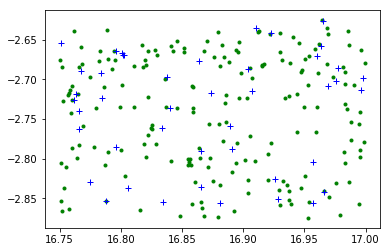

In [52]:
plt.plot(sgc['ra'],sgc['dec'],'g.')
plt.plot(dat_kaylan['ra'],dat_kaylan['dec'],'b+')

In [32]:
max(dat_kaylan['dec']),min(dat_kaylan['dec']),max(dat_kaylan['ra']),min(dat_kaylan['ra'])

(-2.6268785512727129,
 -2.8565646314838955,
 16.997899656459413,
 16.751006322245345)

In [27]:
max(dat_anand['dec'])

-2.741575515335144

In [29]:
WorkDir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/obiwan_run/brickstat/elg_new_ccd_list/'
fn_ccd_num = 'BrickccdNum.txt'
#fn_run_time = 
import matplotlib.pyplot as plt
import numpy as np
ccd_num = np.loadtxt(WorkDir+fn_ccd_num,dtype=np.str).transpose()
#run_time = np.loadtxt(WorkDir+fn_run_time,dtype=np.str).transpose()

#and a plot of 3d distribution of ccds
def brickname2radec(brickname):
    ra_f = int(brickname[0:3])
    ra_b = int(brickname[3])
    ra = ra_f+0.1*ra_b
    dec_f = int(brickname[5:7])
    dec_b = int(brickname[7])
    dec = dec_f + dec_b*0.1
    if brickname[4] == 'm':
        dec = dec*(-1)
    return ra,dec

In [30]:
radecs = list(map(brickname2radec,ccd_num[0]))

(-2.8565646314838955, -2.626878551272713)

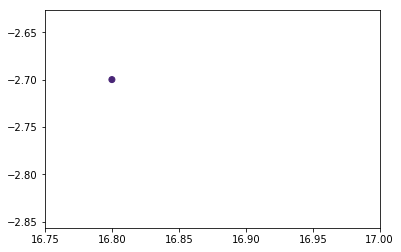

In [33]:
ra_dec = np.array(radecs).transpose()
ra = ra_dec[0]
dec = ra_dec[1]
plt.scatter(ra,dec,c=num_hist)
plt.gca().set_xlim((16.75,17))
plt.gca().set_ylim((-2.8565646314838955, -2.6268785512727129))